buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64
Decision Tree Model Accuracy: 0.9711
Confusion Matrix:
 [[ 66   0   1   0]
 [  0  12   0   0]
 [  5   0 246   0]
 [  4   0   0  12]]
Classification Report:
               precision    recall  f1-score   support

         acc       0.88      0.99      0.93        67
        good       1.00      1.00      1.00        12
       unacc       1.00      0.98      0.99       251
       vgood       1.00      0.75      0.86        16

    accuracy                           0.97       346
   macro avg       0.97      0.93      0.94       346
weighted avg       0.97      0.97      0.97       346



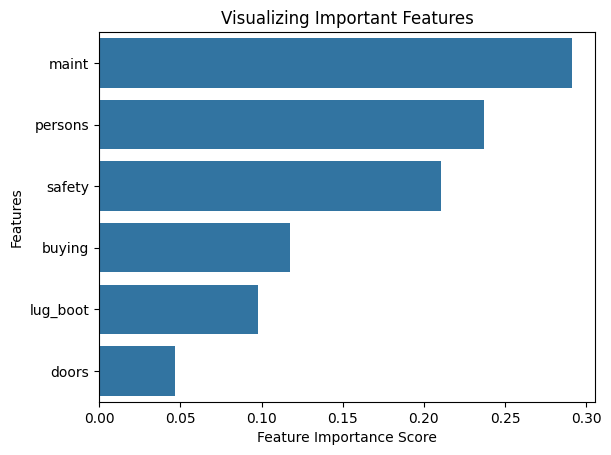

In [5]:
# Import necessary libraries
!pip install category_encoders

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('car_evaluation.csv')

# Rename columns for easier reference
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

# Check for missing values
print(df.isnull().sum())

# Separate features (X) and target (y)
X = df.drop(['class'], axis=1)
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=109)

# Encode the categorical features
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
clf.fit(X_train, y_train)

# Predict the test set results
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Model Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize feature importance
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()
